# 08 · Timeline (SPEC-B-012)

Visualise transit hits using the golden timeline fixture.

In [1]:
from __future__ import annotations

import os
import sys
from pathlib import Path

import pandas as pd

ASTRO_ROOT = Path(os.environ.get('ASTROENGINE_ROOT', '..')).resolve()
DOCS_ROOT = Path(os.environ.get('DOCS_SITE_ROOT', 'docs-site')).resolve()
FIXTURES = DOCS_ROOT / 'docs' / 'fixtures'
os.environ.setdefault('SE_EPHE_PATH', str(ASTRO_ROOT / 'datasets' / 'swisseph_stub'))
if str(ASTRO_ROOT) not in sys.path:
    sys.path.insert(0, str(ASTRO_ROOT))

In [2]:
timeline = pd.read_json(FIXTURES / 'timeline_events.json')
timeline

,angle_deg,family,kind,moving,orb_abs,target,ts
0,0,major,aspect_conjunction,Mars,8.171664e-07,Saturn,2024-02-03T03:52:17.050013Z


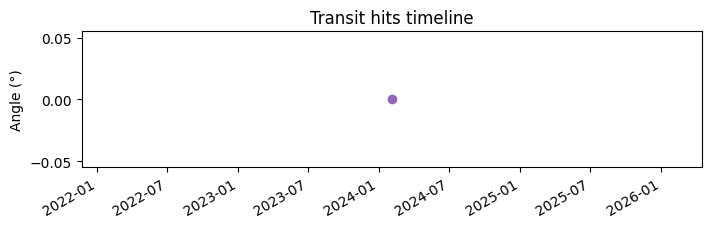

In [3]:
import matplotlib.pyplot as plt

if not timeline.empty:
    timeline['ts'] = pd.to_datetime(timeline['ts'])
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.scatter(timeline['ts'], timeline['angle_deg'], c='tab:purple')
    ax.set_ylabel('Angle (°)')
    ax.set_title('Transit hits timeline')
    fig.autofmt_xdate()
    plt.show()

In [4]:
import hashlib

print('Results checksum:', hashlib.sha256((FIXTURES / 'timeline_events.json').read_bytes()).hexdigest())

Results checksum: 734ea6c054374e0d086df334c7b75d7f3cd15af8da2b03713da5d499b413a65f
